<a href="https://colab.research.google.com/github/Ph-tech06/Imagedata-Augmentation-and-Image-Classification/blob/main/Image_Classification_Notebook_with_Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Question 1: Color Image Display Difference***

* **Question**: Why do you think the color images displayed above look different (that is, Method 1 vs Method 2)?


* **Answer**: The color difference is due to the different ways the libraries handle image color channels.

**Method 1 (Pillow & Matplotlib)**: Pillow (PIL) opens images in RGB (Red, Green, Blue) format. Since

matplotlib also displays images in RGB, the colors appear correct.

**Method 2 (OpenCV & Matplotlib)**: OpenCV (cv2) reads images in BGR (Blue, Green, Red) format. When Matplotlib displays this BGR image, it interprets the channels as RGB, which swaps the red and blue channels and results in distorted colors (e.g., the moon appearing bluish)

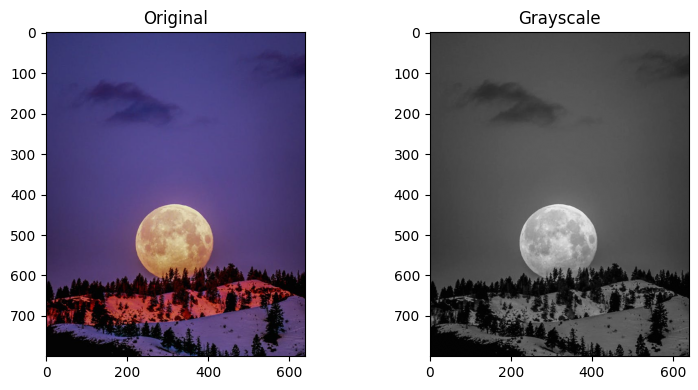

In [ ]:
# Method 1: Reading a color image an converting to grayscale image

import matplotlib.pyplot as plt
from PIL import Image

original = Image.open('moon-pexels-frank-cone.jpg')
grayscale = original.convert('L')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

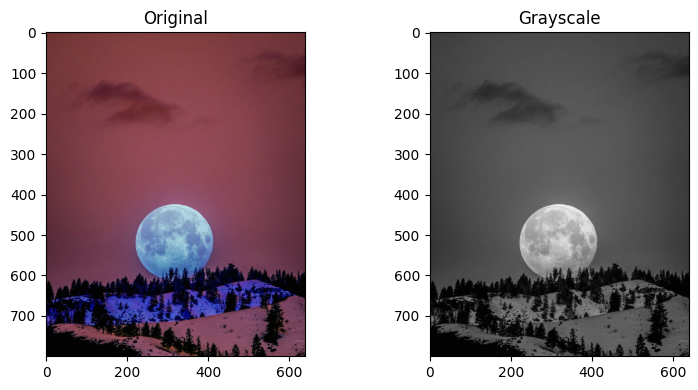

In [ ]:
# Method 2: Reading a color image an converting to grayscale image

import cv2
original = cv2.imread('moon-pexels-frank-cone.jpg')

# Use the cvtColor() function to grayscale the image
grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

# ***Question 2: Image Transformation with OpenCV***

* **Question**: Implement the following types of image transformation with OpenCV functions: 1. Image resize 2. Image rotation.

* **Answer**: Here is the Python code using OpenCV to perform image resizing and rotation.

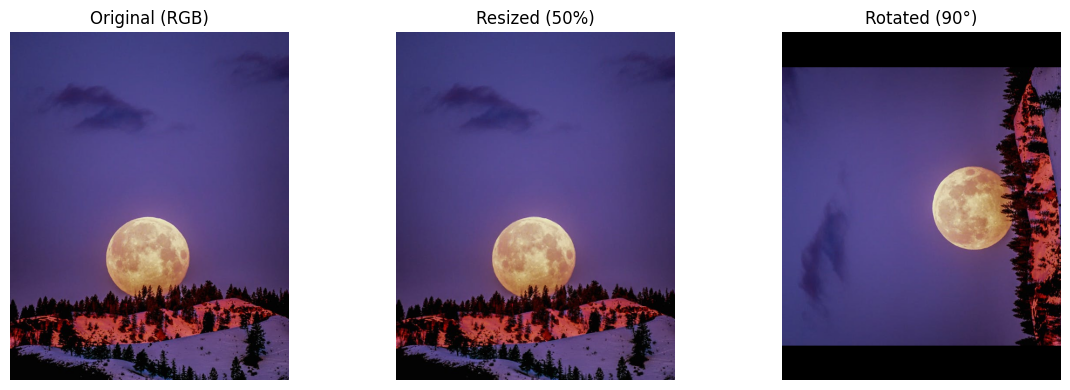

In [ ]:
# Solution for Question 2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
original = cv2.imread('moon-pexels-frank-cone.jpg')
# Convert from BGR to RGB for correct display in Matplotlib
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# 1. Image Resize
# Resize the image to be half its original dimensions.
height, width = original.shape[:2]
resized = cv2.resize(original_rgb, (width // 2, height // 2), interpolation=cv2.INTER_AREA)

# 2. Image Rotation
# Rotate the image by 90 degrees around its center.
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center=center, angle=90, scale=1.0)
rotated = cv2.warpAffine(original_rgb, rotation_matrix, (width, height))

# --- Display the results ---
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(original_rgb)
ax[0].set_title("Original (RGB)")
ax[0].axis('off')
ax[1].imshow(resized)
ax[1].set_title("Resized (50%)")
ax[1].axis('off')
ax[2].imshow(rotated)
ax[2].set_title("Rotated (90°)")
ax[2].axis('off')

fig.tight_layout()
plt.show()

# ***Question 3: PyTorch Data Augmentation***

**Question**: Load images from the Cat_Dog_data/train folder, define a few additional transforms, then build the dataloader.

**Answer**: The following code block creates a torchvision transform pipeline that includes data augmentation techniques like random rotation, resized cropping, and horizontal flipping to diversify the training data.

* Step 1 : Download the cat and dog dataset
* Step 2 : Unzip the dataset
* Step 3 : Run the Python code

* Then check the respective Output

In [ ]:
# Downlaod the cat and dog dataset
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2025-09-18 10:46:03--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.227.104, 52.217.174.104, 54.231.231.32, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.227.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  57.7MB/s    in 10s     

2025-09-18 10:46:14 (55.0 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [ ]:
# unzip the dataset
!unzip Cat_Dog_data.zip

In [ ]:
# Solution for Question 3
import torch
from torchvision import datasets, transforms

data_dir = 'Cat_Dog_data/train'

# Define transforms with added data augmentation
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])

# Load the dataset with the defined transforms
dataset = datasets.ImageFolder(data_dir, transform=train_transforms)

# Build the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

print("DataLoader created successfully with data augmentation.")

DataLoader created successfully with data augmentation.


# Now DataLoader created successfully with data augmentation.

------------------------------------------------------------------------

# ***Question 4: MNIST Sample Display***

* **Question**: Display a few images below to show how the MNIST dataset look like.

* **Answer**: The complete solution involves visualizing the data and then building and training a model to classify it.

In [ ]:
# it's define the "trainloader"
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 507kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.24MB/s]


* **Part 1**: Displaying the Data
First, we visualize a sample of the MNIST dataset to understand its structure.

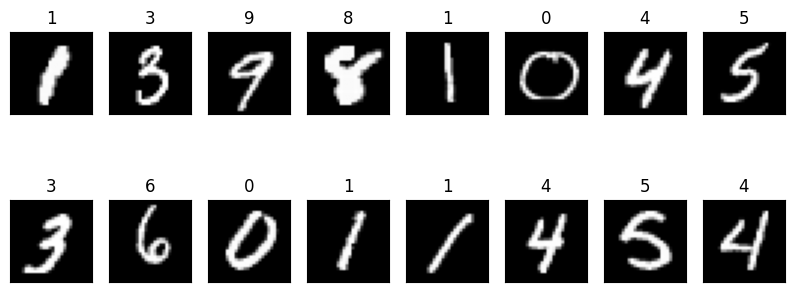

In [ ]:
# Question 4 Solution (Part 1): Display MNIST samples
import matplotlib.pyplot as plt
import numpy as np

# Create an iterator from the trainloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Create a figure to display 16 sample images
fig = plt.figure(figsize=(10, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 8, idx+1, xticks=[], yticks=[])
    # Squeeze the channel dimension for grayscale display
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

plt.show()

* **Part 2**: Building and Training the PyTorch MLP Model
The notebook then outlines the steps to create and train a Multi-Layer Perceptron (MLP) to classify the digits.

In [ ]:
# Model Definition
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

# Model Instantiation and Training
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.33858229185956945
Training loss: 0.16942705609488176
Training loss: 0.13437639334465443
Training loss: 0.11523910496842617
Training loss: 0.10868585362672004


# ***Question 5: MNIST Classification with TensorFlow-Keras***

* **Question**: Write the entire MNIST image classification code using an object-oriented approach using the Tensorflow Keras library as below.

* **Answer**: The complete, filled-in code for the MNISTClassifier class and the script to run it are provided below.

In [ ]:
# Solution for Question 5
import os
import cv2
import numpy as np
import tensorflow as tf

class MNISTClassifier:
    def __init__(self):
        self.model: tf.keras.Model | None = None

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        x_train = (x_train.astype("float32") / 255.0)[..., np.newaxis]
        x_test  = (x_test.astype("float32") / 255.0)[..., np.newaxis]
        return (x_train, y_train), (x_test, y_test)

    def build_model(self):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ])
        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def train(self, x_train, y_train, epochs=5, batch_size=64):
        self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    def evaluate(self, x_test, y_test):
        _, acc = self.model.evaluate(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {acc:.4f}")
        return acc

    def predict_with_opencv(self, x_test, y_test, num_samples=3, out_dir="mnist_opencv_samples", display=False):
        os.makedirs(out_dir, exist_ok=True)
        for i in range(num_samples):
            digit = (x_test[i] * 255).astype("uint8").squeeze(axis=-1)
            label = int(y_test[i])
            filename = os.path.join(out_dir, f"digit_{i}_label_{label}.png")
            cv2.imwrite(filename, digit)

            img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            img = img.astype("float32")/255.0
            img = np.expand_dims(img, axis=(0, -1))

            probs = self.model.predict(img, verbose=0)
            pred_class = int(np.argmax(probs, axis=-1)[0])
            print(f"Sample {i}: True={label} | Pred={pred_class}")

            if display:
                try:
                    cv2.imshow("digit", (img[0,...,0]*255).astype("uint8"))
                    cv2.waitKey(500)
                    cv2.destroyAllWindows()
                except cv2.error:
                    print("GUI not available")

def run_step(step_no, title, func, *args, **kwargs):
    print(f"\n[Step {step_no}] {title}")
    result = func(*args, **kwargs)
    print(f"[Step {step_no}] Completed.")
    return result

# --- Main execution script ---
EPOCHS = 5
BATCH_SIZE = 64

clf = run_step(1, "Instantiate classifier", MNISTClassifier)
(x_train,y_train), (x_test,y_test) = run_step(2, "Load MNIST", clf.load_data)
run_step(3, "Build model", clf.build_model)
run_step(4, "Train", clf.train, x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
run_step(5, "Evaluate", clf.evaluate, x_test, y_test)
run_step(6, "Predict with OpenCV", clf.predict_with_opencv, x_test, y_test, num_samples=3)


[Step 1] Instantiate classifier
[Step 1] Completed.

[Step 2] Load MNIST
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[Step 2] Completed.

[Step 3] Build model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[Step 3] Completed.

[Step 4] Train
Epoch 1/5
938/938 - 49s - 52ms/step - accuracy: 0.9538 - loss: 0.1560
Epoch 2/5
938/938 - 83s - 88ms/step - accuracy: 0.9859 - loss: 0.0473
Epoch 3/5
938/938 - 49s - 53ms/step - accuracy: 0.9891 - loss: 0.0332
Epoch 4/5
938/938 - 81s - 87ms/step - accuracy: 0.9927 - loss: 0.0224
Epoch 5/5
938/938 - 47s - 50ms/step - accuracy: 0.9948 - loss: 0.0177
[Step 4] Completed.

[Step 5] Evaluate
Test Accuracy: 0.9904
[Step 5] Completed.

[Step 6] Predict with OpenCV
Sample 0: True=7 | Pred=7
Sample 1: True=2 | Pred=2
Sample 2: True=1 | Pred=1
[Step 6] Completed.
